In [4]:
import numpy as np
import cv2
import pandas as pd

import matplotlib.pyplot as plt

In [22]:
cap = cv2.VideoCapture("data/sample.mkv")

In [24]:
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
length

3046

In [27]:
# extract frames

if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed

count = 0
while(cap.isOpened()):
  
  ret, frame = cap.read()
  if ret:
    if count % 100 == 0:
        print(f"Saving frame {count} ...")
        cv2.imwrite(f"data/imgs/sample_{count}.jpeg", frame)
    count += 1

  else:
    break

cap.release()

Saving frame 0 ...
Saving frame 100 ...
Saving frame 200 ...
Saving frame 300 ...
Saving frame 400 ...
Saving frame 500 ...
Saving frame 600 ...
Saving frame 700 ...
Saving frame 800 ...
Saving frame 900 ...
Saving frame 1000 ...
Saving frame 1100 ...
Saving frame 1200 ...
Saving frame 1300 ...
Saving frame 1400 ...
Saving frame 1500 ...
Saving frame 1600 ...
Saving frame 1700 ...
Saving frame 1800 ...
Saving frame 1900 ...
Saving frame 2000 ...
Saving frame 2100 ...
Saving frame 2200 ...
Saving frame 2300 ...
Saving frame 2400 ...
Saving frame 2500 ...
Saving frame 2600 ...
Saving frame 2700 ...
Saving frame 2800 ...
Saving frame 2900 ...


In [5]:
import matplotlib.pyplot as plt

In [18]:
def compute_luminance(input_img):
    return (0.2126 * input_img[:, :, 0] + 0.7152 * input_img[:, :, 1] + 0.0722 * input_img[:, :, 2]) / 255

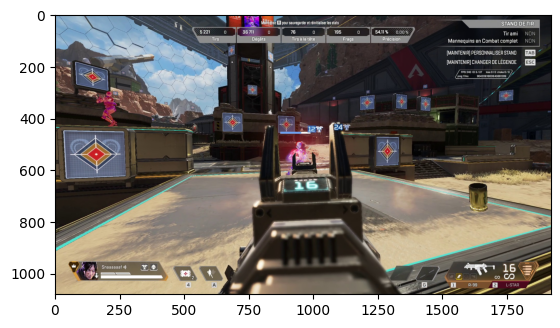

In [6]:
img = plt.imread("data/imgs/sample_100.jpeg")
plt.imshow(img)

In [3]:
x_start, y_start, x_end, y_end = 0, 0, 0, 0
cropping = False

image = cv2.imread('data/imgs/sample_100.jpeg')
oriImage = image.copy()

def mouse_crop(event, x, y, flags, param):
    # grab references to the global variables
    global x_start, y_start, x_end, y_end, cropping
    # if the left mouse button was DOWN, start RECORDING
    # (x, y) coordinates and indicate that cropping is being
    if event == cv2.EVENT_LBUTTONDOWN:
        x_start, y_start, x_end, y_end = x, y, x, y
        cropping = True
    # Mouse is Moving
    elif event == cv2.EVENT_MOUSEMOVE:
        if cropping == True:
            x_end, y_end = x, y
    # if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates
        x_end, y_end = x, y
        cropping = False # cropping is finished
        refPoint = [(x_start, y_start), (x_end, y_end)]
        if len(refPoint) == 2: #when two points were found
            roi = oriImage[refPoint[0][1]:refPoint[1][1], refPoint[0][0]:refPoint[1][0]]
            cv2.imshow("Cropped", roi)

cv2.namedWindow("image")
cv2.setMouseCallback("image", mouse_crop)

while True:
    i = image.copy()
    if not cropping:
        cv2.imshow("image", image)
    elif cropping:
        cv2.rectangle(i, (x_start, y_start), (x_end, y_end), (255, 0, 0), 2)
        cv2.imshow("image", i)
    cv2.waitKey(1)
# close all open windows
cv2.destroyAllWindows()

KeyboardInterrupt: 

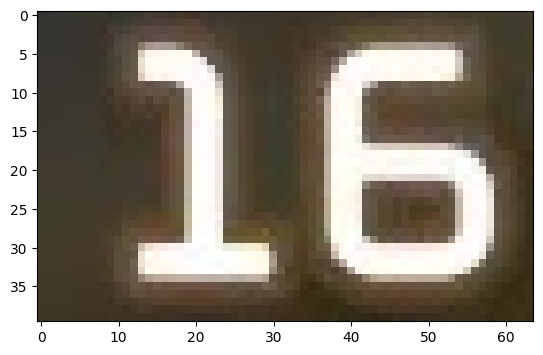

In [17]:
# ammo pos
# 960:1000, 1720:1784

img = plt.imread("data/imgs/sample_100.jpeg")
img_crop = img[960:1000, 1720:1784, :]

plt.imshow(img[960:1000, 1720:1784, :])

In [1]:
from doctr.models import crnn_mobilenet_v3_small

/home/antoine/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
from doctr.models import crnn_mobilenet_v3_large

model = crnn_mobilenet_v3_large(pretrained=True)
model.eval()

CRNN(
  (feat_extractor): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bia

In [9]:
import torch
from torchvision.transforms.functional import to_tensor, pad, resize
img_tensor = to_tensor(img_crop).unsqueeze(0)
h, w = img_tensor.shape[-2:]
img_tensor_preprocessed = resize(pad(img_tensor, (32, 0, 32, 0)), (32, 128))

/home/antoine/.local/lib/python3.10/site-packages/torchvision/transforms/functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
/home/antoine/.local/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (curre

In [83]:
img_np = img_tensor_preprocessed.squeeze().permute((1, 2, 0)).numpy()

In [45]:
img_tensor.shape

torch.Size([3, 40, 64])

In [85]:
model(img_tensor_preprocessed)

{'preds': [('16', 0.9990672469139099)]}

{'preds': [('24', 0.980721116065979)]}


/home/antoine/.local/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


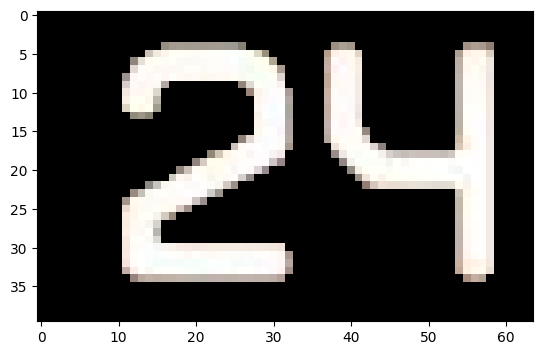

{'preds': [('a', 0.6347399353981018)]}


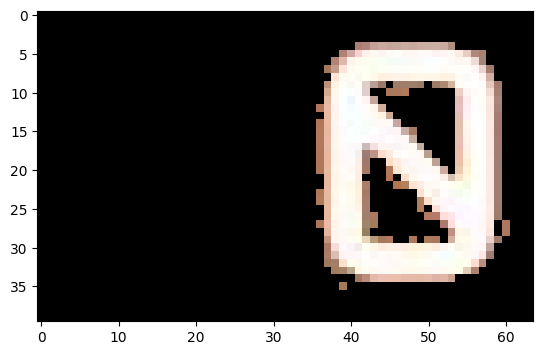

{'preds': [('23', 0.9998623132705688)]}


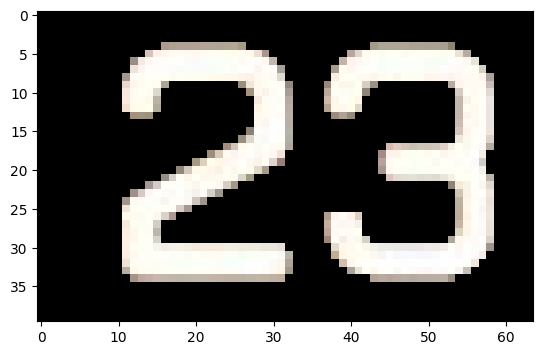

{'preds': [('0', 0.40644052624702454)]}


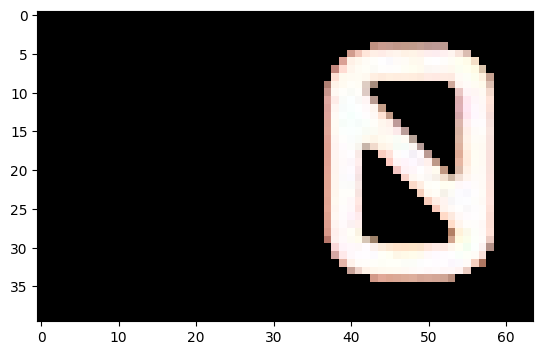

{'preds': [('9', 0.9994074106216431)]}


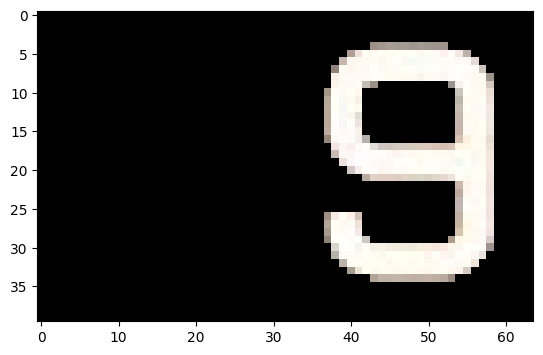

{'preds': [('0', 0.3979032039642334)]}


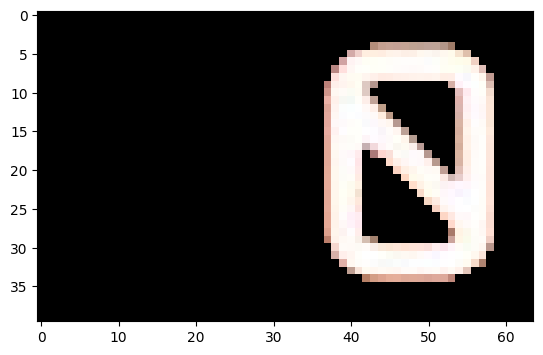

{'preds': [('a', 0.569091796875)]}


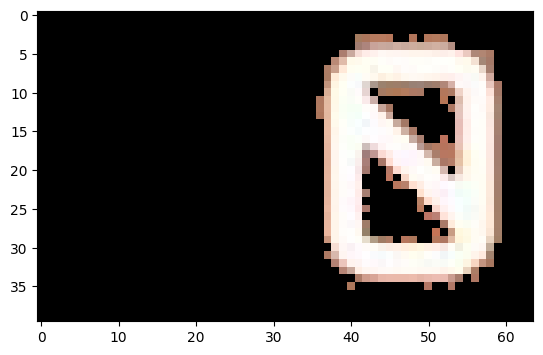

{'preds': [('0', 0.38801276683807373)]}


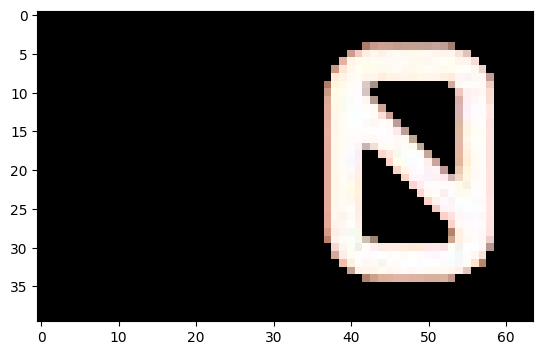

{'preds': [('21', 0.9997506737709045)]}


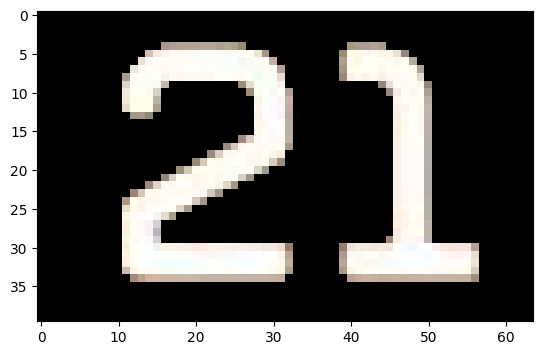

{'preds': [('15', 0.9999725818634033)]}


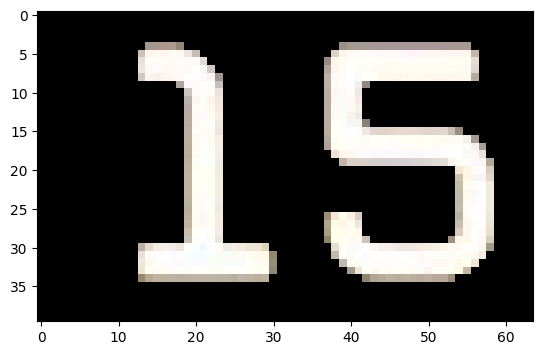

{'preds': [('7', 0.9998451471328735)]}


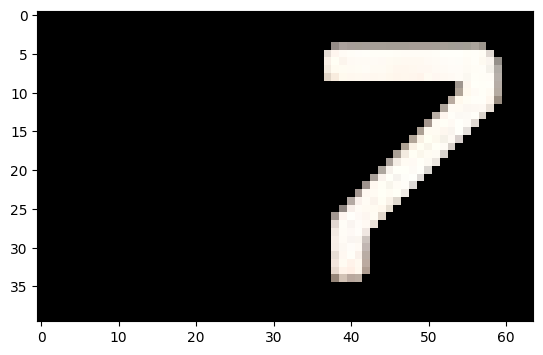

{'preds': [('0', 0.41761207580566406)]}


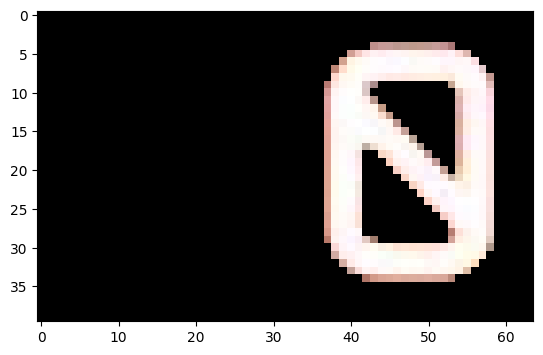

{'preds': [('11', 0.9993436932563782)]}


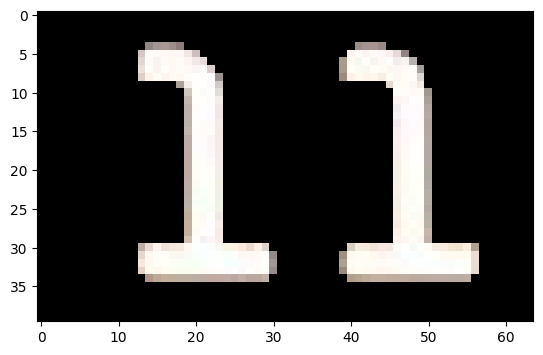

{'preds': [('3', 0.9994531273841858)]}


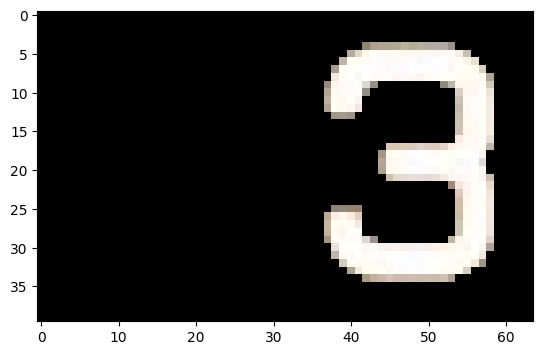

{'preds': [('0', 0.43695327639579773)]}


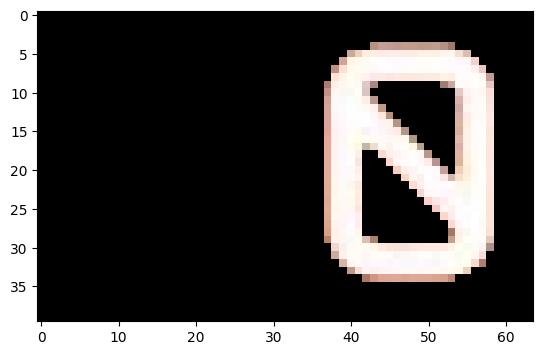

{'preds': [('9', 0.9993682503700256)]}


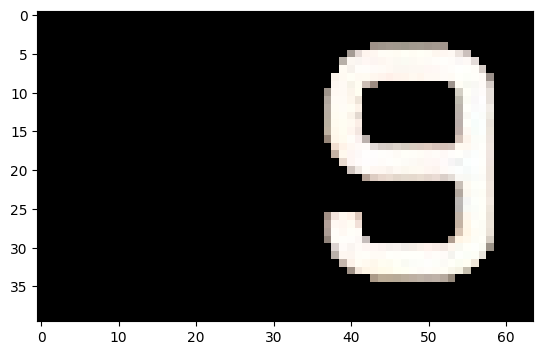

{'preds': [('0', 0.370229035615921)]}


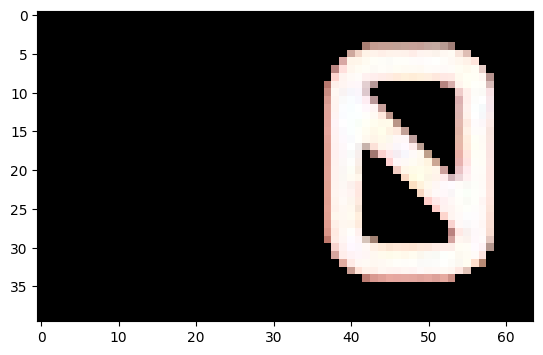

{'preds': [('0', 0.35638517141342163)]}


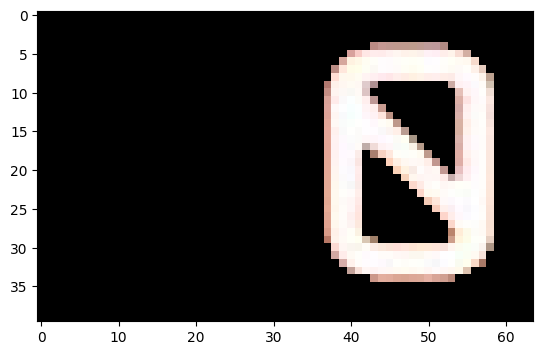

{'preds': [('11', 0.9992064833641052)]}


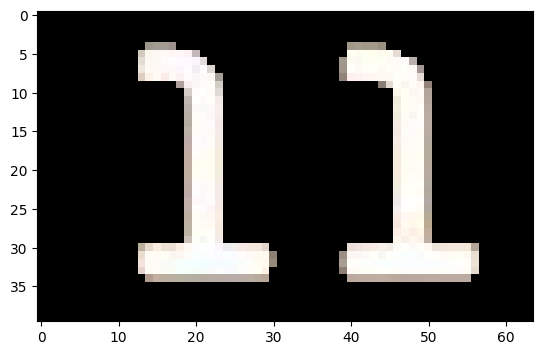

{'preds': [('9', 0.9993712306022644)]}


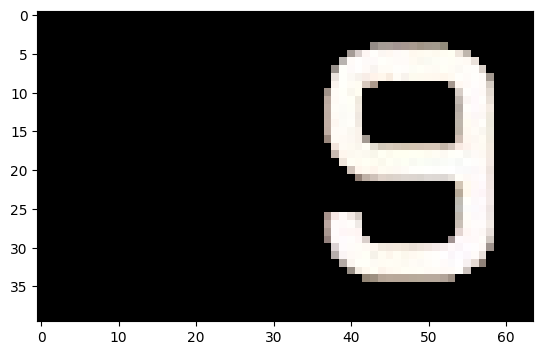

{'preds': [('26', 0.9998596906661987)]}


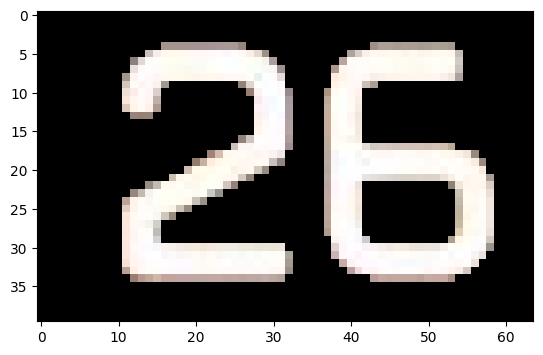

{'preds': [('0', 0.3390645980834961)]}


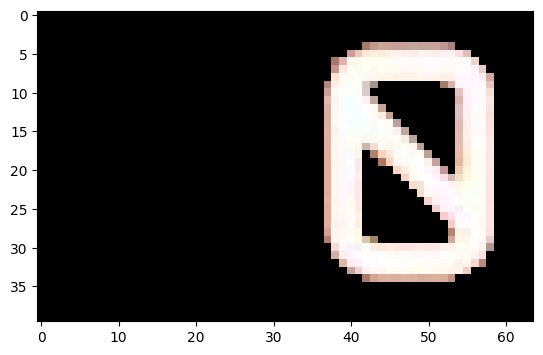

{'preds': [('17', 0.9999006986618042)]}


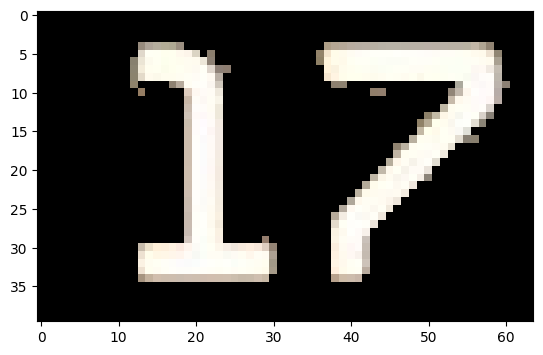

{'preds': [('6', 0.9919546246528625)]}


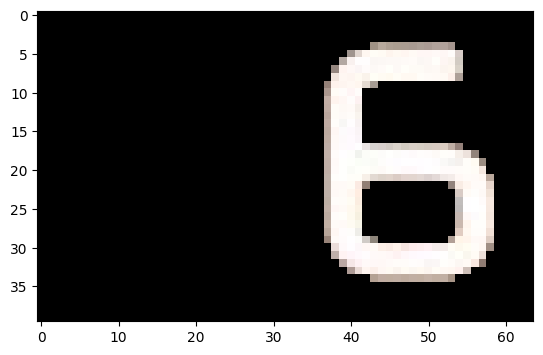

{'preds': [('18', 0.9999285936355591)]}


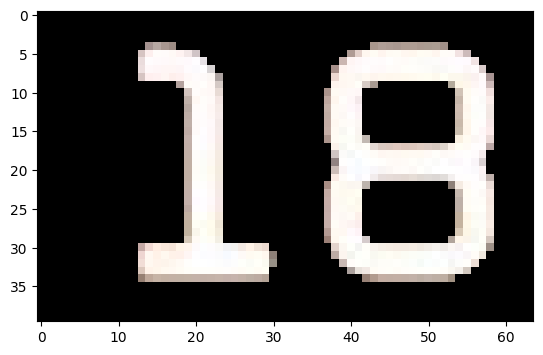

{'preds': [('16', 0.9999910593032837)]}


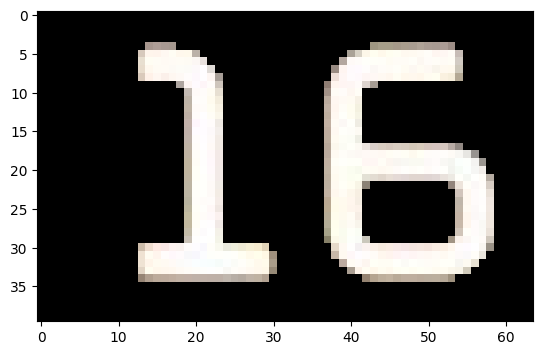

{'preds': [('0', 0.41273701190948486)]}


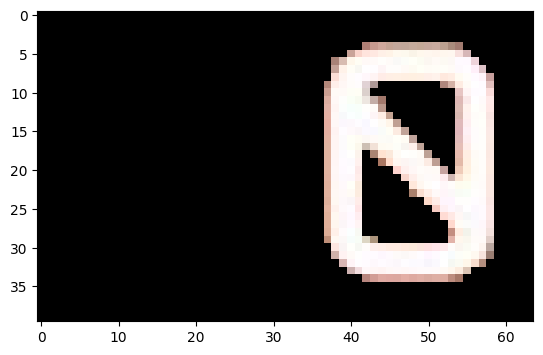

{'preds': [('26', 0.9999343156814575)]}


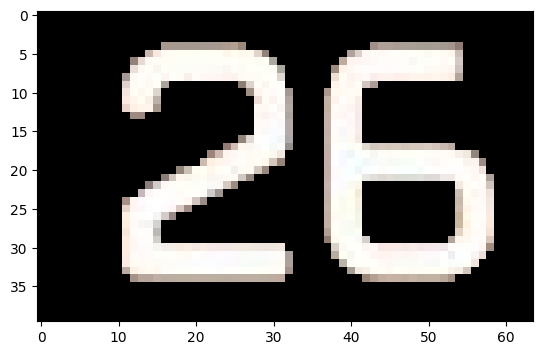

{'preds': [('21', 0.9998238682746887)]}


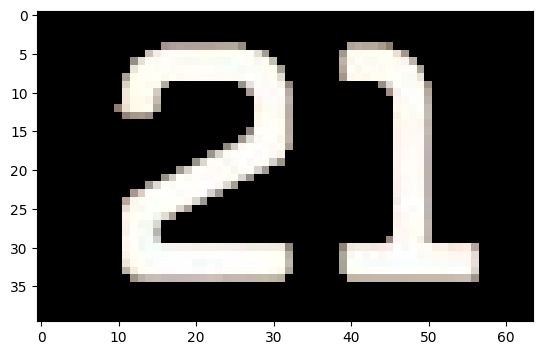

{'preds': [('0', 0.3686015009880066)]}


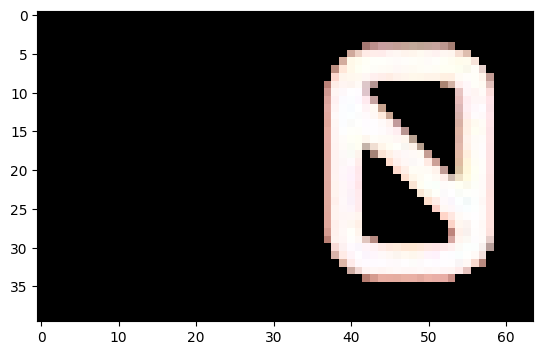

In [12]:
import os

for img_path in os.listdir("data/imgs/"):
    img_path = os.path.join("data/imgs/", img_path)

    img = plt.imread(img_path)
    img_crop = img[960:1000, 1720:1784, :]

    # filter out low luminance pixels
    img_lum = compute_luminance(img_crop)
    img_crop_filtered = img_crop.copy()
    img_crop_filtered[img_lum < 0.5] = 0

    img_tensor = to_tensor(img_crop_filtered).unsqueeze(0)
    h, w = img_tensor.shape[-2:]
    img_tensor_preprocessed = resize(pad(img_tensor, (32, 0, 32, 0)), (32, 128))

    out = model(img_tensor_preprocessed)
    print(out)
    plt.imshow(img_crop_filtered)
    plt.show()

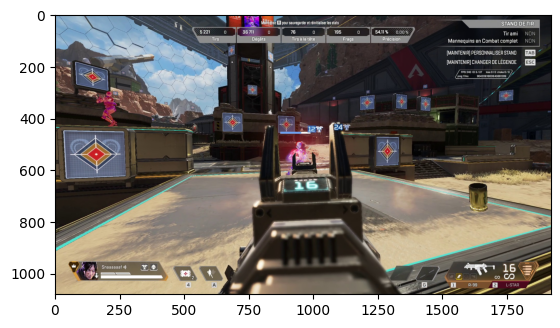

In [5]:
img = plt.imread("data/imgs/sample_100.jpeg")
plt.imshow(img)

In [136]:
crop = img[960:1000, 1720:1784, :]

In [137]:
img_lum = (0.2126 * crop[:, :, 0] + 0.7152 * crop[:, :, 1] + 0.0722 * crop[:, :, 2]) / 255

In [149]:
masked_crop = crop.copy()
masked_crop[img_lum < 0.3] = 0

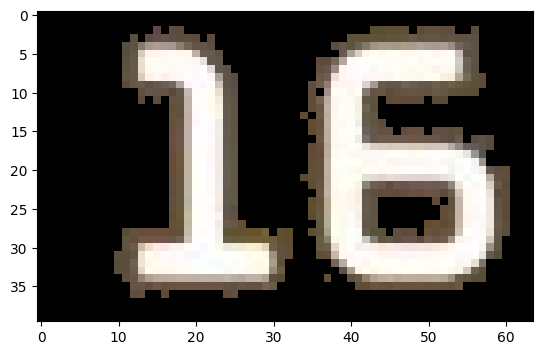

In [150]:
plt.imshow(masked_crop)

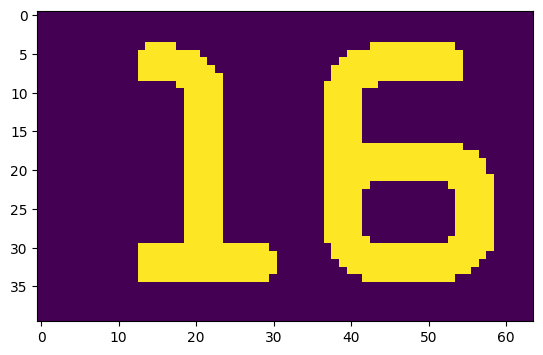

In [139]:
plt.imshow(img_lum > 0.5)

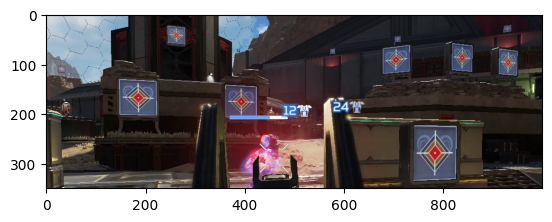

In [6]:
plt.imshow(img[250:600, 500:1500, :])

In [101]:
from doctr.models import detection_predictor
import numpy as np

In [103]:
model = detection_predictor(arch='db_resnet50', pretrained=True)

img_crop = img[960:1000, 1720:1784, :]
img_tensor = to_tensor(img_crop).unsqueeze(0)

out = model(img_tensor)

/home/antoine/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/antoine/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/antoine/.local/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, whi

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth


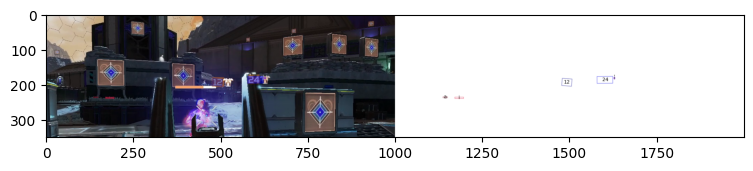

In [15]:
from mmocr.apis import MMOCRInferencer

infer = MMOCRInferencer(det='dbnetpp', rec='svtr-small')
result = infer(img[250:600, 500:1500, :], return_vis=True)
     

# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 16))
plt.imshow(result['visualization'][0])
plt.show()

In [14]:
result["predictions"][0].keys()

dict_keys(['rec_texts', 'rec_scores', 'det_polygons', 'det_scores'])

In [20]:
result["predictions"][0]["rec_texts"]

['i', 'a', '12', '24', 'i']

In [16]:
just_ocr = MMOCRInferencer(det='dbnetpp', rec='svtr-small')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnetpp/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015/dbnetpp_resnet50-oclip_fpnc_1200e_icdar2015_20221101_124139-4ecb39ac.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/svtr/svtr-small_20e_st_mj/svtr-small_20e_st_mj-35d800d6.pth


In [19]:
import os

for img_path in os.listdir("data/imgs/"):
    img_path = os.path.join("data/imgs/", img_path)

    img = plt.imread(img_path)
    img_crop = img[960:1000, 1720:1784, :]

    # filter out low luminance pixels
    img_lum = compute_luminance(img_crop)
    img_crop_filtered = img_crop.copy()
    img_crop_filtered[img_lum < 0.5] = 0

    img_tensor = to_tensor(img_crop_filtered).unsqueeze(0)
    h, w = img_tensor.shape[-2:]
    img_tensor_preprocessed = resize(pad(img_tensor, (32, 0, 32, 0)), (32, 128))

    out = just_ocr(img_tensor_preprocessed)
    print(out)
    plt.imshow(img_crop_filtered)
    plt.show()

NameError: name 'to_tensor' is not defined